## Kaggle’s_Credit_Card_Fraud_Detection


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("dataset.csv")
df

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,0
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,1
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,0
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,0
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37092,1250026389,637,546587,62.0,Female,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,534813,198167,794190,259377,1
37093,1247133695,582,734131,20.0,Male,Divorced,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,178903,147133,468317,289414,0
37094,1260545996,571,347867,67.0,Male,Married,Credit,White,Visa,Debit,International,120000,4000000,150000,301594,256814,385770,598596,1
37095,1267917366,528,343123,58.0,Female,Unknown,Debit,Gold,Verve,Credit,International,150000,2000000,500000,212826,113439,635798,422972,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CardInformation            37097 non-null  int64  
 3   CustomerAge                28246 non-null  float64
 4   Gender                     37097 non-null  object 
 5   Marital Status             37097 non-null  object 
 6   Cards                      37097 non-null  object 
 7   CardColour                 37097 non-null  object 
 8   CardType                   37097 non-null  object 
 9   TransactionType            37097 non-null  object 
 10  Domain                     37097 non-null  object 
 11  ATM                        37097 non-null  int64  
 12  POSWEBLimit                37097 non-null  int64  
 13  CreditLimit                37097 non-null  int

The dataset has been successfully loaded, and it contains `37,097` entries with `19` columns. Notably, the `CustomerAge` column has missing values, which will need to be addressed during preprocessing.

Next, I will perform the following preprocessing steps:

Handle missing values in the `CustomerAge` column.

Check for duplicate entries and remove them if found.

In [48]:
# Handling missing values in the CustomerAge column by filling with the median
median_age = df['CustomerAge'].median()
df['CustomerAge'].fillna(median_age, inplace=True)



In [49]:
# Checking for duplicates and removing them
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Displaying the updated dataframe info to confirm changes
print(df.info())
print('Missing values handled and duplicates removed if any.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CardInformation            37097 non-null  int64  
 3   CustomerAge                37097 non-null  float64
 4   Gender                     37097 non-null  object 
 5   Marital Status             37097 non-null  object 
 6   Cards                      37097 non-null  object 
 7   CardColour                 37097 non-null  object 
 8   CardType                   37097 non-null  object 
 9   TransactionType            37097 non-null  object 
 10  Domain                     37097 non-null  object 
 11  ATM                        37097 non-null  int64  
 12  POSWEBLimit                37097 non-null  int64  
 13  CreditLimit                37097 non-null  int

: 

In [8]:
unique_age = df['CustomerAge'].unique()
print(unique_age)
median_age = df['CustomerAge'].median()
median_age

[28. 25. 21. 26. 23. 27. 22. 18. 29. 20. 24. 19. 30. nan 72. 37. 47. 64.
 68. 49. 70. 53. 43. 82. 55. 54. 79. 81. 50. 78. 36. 59. 62. 74. 69. 38.
 40. 60. 31. 58. 35. 61. 45. 85. 75. 83. 65. 44. 32. 48. 52. 51. 41. 76.
 66. 63. 80. 67. 57. 46. 71. 84. 56. 73. 33. 34. 77. 42. 39.]


np.float64(29.0)

In [21]:
df['age'] = df.groupby('Outcome')['CustomerAge'].transform(lambda x: x.fillna(x.median()))
df['age']

0        28.0
1        25.0
2        21.0
3        26.0
4        28.0
         ... 
37092    62.0
37093    20.0
37094    67.0
37095    58.0
37096    27.0
Name: age, Length: 37097, dtype: float64

In [18]:
pip install matplotlib 


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.8 MB 3.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/7.8 MB 2.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 2.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 2.2 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.2 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/7.8 MB 2.3 MB/s eta 0:00:02
   -----------------------

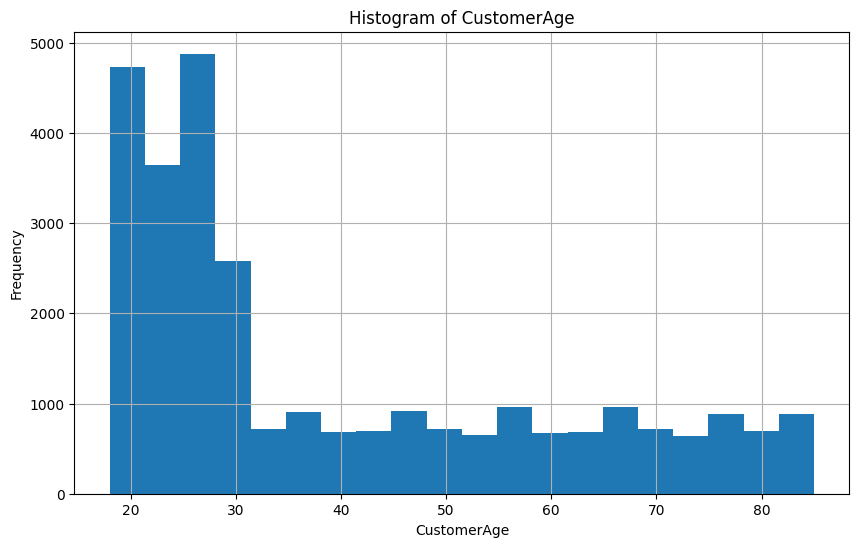

In [26]:


import matplotlib.pyplot as plt

column_to_visualize = 'CustomerAge'

# Set the desired number of bins
num_bins = 20  # Adjust this value as needed

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_visualize], bins=num_bins)
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_visualize}')
plt.grid(True)
plt.show()

In [47]:
masked_age = df[(df['Outcome'] == 0) & (df['CustomerAge'].isnull())]
masked_age

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome,age
12588,1272351910,615,648337,NaN,Female,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,169535,306866,-135438,197081,0,29.0
12589,1262274079,488,574207,NaN,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,332519,100672,611338,278819,0,29.0
12590,1257559104,317,782937,NaN,Male,Unknown,Debit,Gold,Verve,Debit,International,150000,2000000,200000,146306,393473,-606440,389528,0,29.0
12592,1274885880,304,730111,NaN,Male,Single,Prepaid,White,MasterCard,Credit,Local,150000,1200000,600000,554144,172642,1146412,592268,0,29.0
12593,1254699400,316,669190,NaN,Male,Married,Credit,White,Visa,Credit,Local,120000,4000000,500000,475438,292697,724206,248768,0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37044,1268264340,452,631192,NaN,Female,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,315936,119504,753414,437478,0,29.0
37047,1277464360,663,610967,NaN,Female,Single,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,192556,275652,767555,574999,0,29.0
37050,1264266829,233,712376,NaN,Female,Single,Credit,White,Visa,Credit,Local,120000,4000000,500000,254623,122068,827504,572881,0,29.0
37056,1255471702,379,668883,NaN,Male,Unknown,Prepaid,White,MasterCard,Credit,International,150000,1200000,600000,216627,286607,349633,133006,0,29.0
